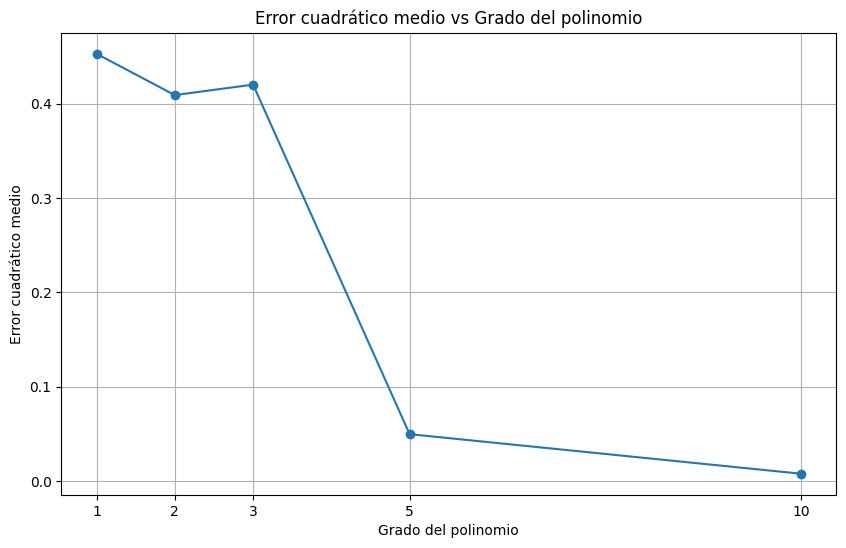

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Generar datos ficticios
np.random.seed(0)
X = np.sort(10 * np.random.rand(100, 1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])  # Generar una función sinusoidal con ruido

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ajustar diferentes grados de polinomios y calcular el error cuadrático medio en el conjunto de prueba
degrees = [1, 2, 3, 5, 10]
mse_list = []

for degree in degrees:
	poly_features = PolynomialFeatures(degree=degree)
	X_train_poly = poly_features.fit_transform(X_train)
	X_test_poly = poly_features.transform(X_test)

	model = LinearRegression()
	model.fit(X_train_poly, y_train)

	y_pred = model.predict(X_test_poly)
	mse = mean_squared_error(y_test, y_pred)
	mse_list.append(mse)

# Graficar el error cuadrático medio en función del grado del polinomio
plt.figure(figsize=(10, 6))
plt.plot(degrees, mse_list, marker='o')
plt.title('Error cuadrático medio vs Grado del polinomio')
plt.xlabel('Grado del polinomio')
plt.ylabel('Error cuadrático medio')
plt.xticks(degrees)
plt.grid(True)
plt.show()


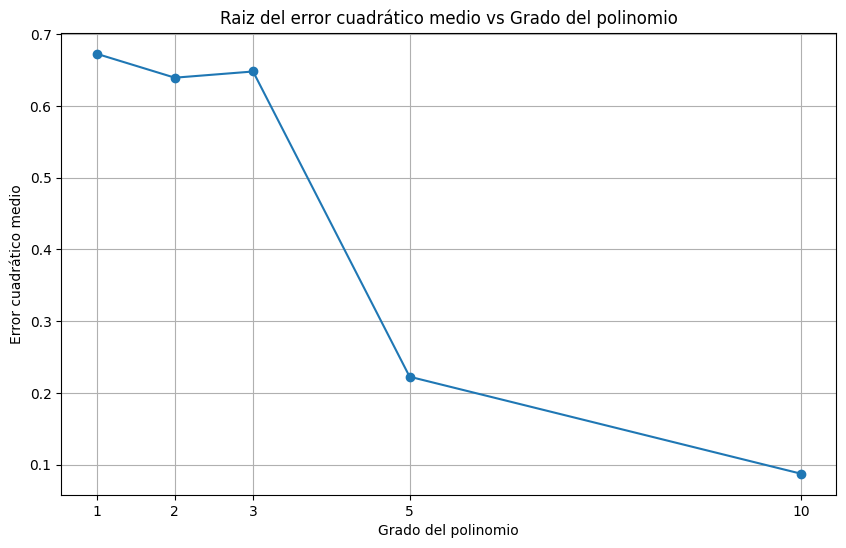

In [12]:
rmse_list = []

for degree in degrees:
	poly_features = PolynomialFeatures(degree=degree)
	X_train_poly = poly_features.fit_transform(X_train)
	X_test_poly = poly_features.transform(X_test)

	model = LinearRegression()
	model.fit(X_train_poly, y_train)

	y_pred = model.predict(X_test_poly)
	rmse = (mean_squared_error(y_test, y_pred))**0.5
	rmse_list.append(rmse)

# Graficar el error cuadrático medio en función del grado del polinomio
plt.figure(figsize=(10, 6))
plt.plot(degrees, rmse_list, marker='o')
plt.title('Raiz del error cuadrático medio vs Grado del polinomio')
plt.xlabel('Grado del polinomio')
plt.ylabel('Error cuadrático medio')
plt.xticks(degrees)
plt.grid(True)
plt.show()

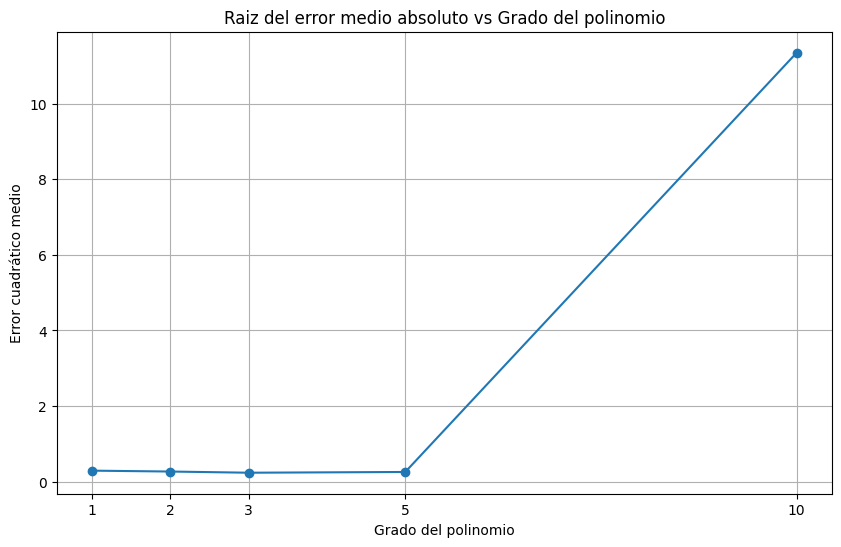

In [25]:
from sklearn.metrics import mean_absolute_error

mae_list = []

for degree in degrees:
	poly_features = PolynomialFeatures(degree=degree)
	X_train_poly = poly_features.fit_transform(X_train)
	X_test_poly = poly_features.transform(X_test)

	model = LinearRegression()
	model.fit(X_train_poly, y_train)

	y_pred = model.predict(X_test_poly)
	mae = mean_absolute_error(y_test, y_pred)
	mae_list.append(mae)

# Graficar el error cuadrático medio en función del grado del polinomio
plt.figure(figsize=(10, 6))
plt.plot(degrees, mae_list, marker='o')
plt.title('Raiz del error medio absoluto vs Grado del polinomio')
plt.xlabel('Grado del polinomio')
plt.ylabel('Error cuadrático medio')
plt.xticks(degrees)
plt.grid(True)
plt.show()

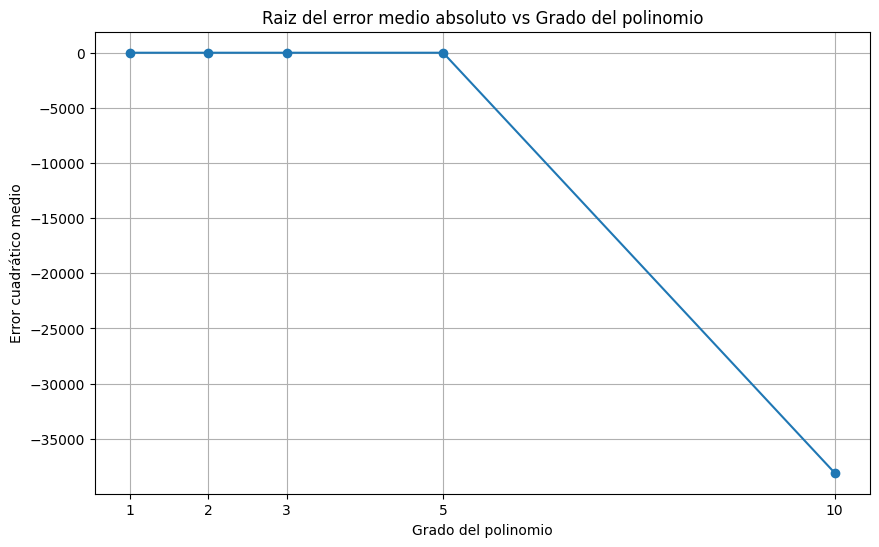

In [26]:
from sklearn.metrics import r2_score

r2_list = []

for degree in degrees:
	poly_features = PolynomialFeatures(degree=degree)
	X_train_poly = poly_features.fit_transform(X_train)
	X_test_poly = poly_features.transform(X_test)

	model = LinearRegression()
	model.fit(X_train_poly, y_train)

	y_pred = model.predict(X_test_poly)
	r2 = r2_score(y_test, y_pred)
	r2_list.append(r2)

# Graficar el error cuadrático medio en función del grado del polinomio
plt.figure(figsize=(10, 6))
plt.plot(degrees, r2_list, marker='o')
plt.title('Raiz del error medio absoluto vs Grado del polinomio')
plt.xlabel('Grado del polinomio')
plt.ylabel('Error cuadrático medio')
plt.xticks(degrees)
plt.grid(True)
plt.show()

In [14]:
import numpy as np

# Generar datos ficticios con una relación logarítmica creciente
np.random.seed(0)
X = np.linspace(1, 10, 100)
y = 2 * np.log(X) + np.random.normal(0, 0.2, 100)  # Función logarítmica con ruido gaussiano


In [15]:
from scipy.optimize import curve_fit

def logarithmic_function(x, a, b):
	return a * np.log(x) + b

# Ajustar la curva logarítmica a los datos
params, _ = curve_fit(logarithmic_function, X, y)
a, b = params

In [16]:
print("Coeficiente 'a':", a)
print("Coeficiente 'b':", b)
print("Interpretación:")
print("El coeficiente 'a' representa el crecimiento o decrecimiento logarítmico de la variable dependiente por cada unidad de cambio en la variable independiente.")
print("El coeficiente 'b' representa el intercepto de la curva logarítmica.")

Coeficiente 'a': 1.9380668967409198
Coeficiente 'b': 0.10822350530434788
Interpretación:
El coeficiente 'a' representa el crecimiento o decrecimiento logarítmico de la variable dependiente por cada unidad de cambio en la variable independiente.
El coeficiente 'b' representa el intercepto de la curva logarítmica.


In [17]:
# Generar datos ficticios para el crecimiento de una población de organismos en función del tiempo
X_biology = np.linspace(1, 10, 100)
y_biology = 2 * np.log(X_biology) + np.random.normal(0, 0.2, 100)  # Función logarítmica con ruido gaussiano
# Aplicar el mismo procedimiento de ajuste de curva logarítmica
params_biology, _ = curve_fit(logarithmic_function, X_biology, y_biology)

In [18]:
import numpy as np

class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        m, n = X.shape
        self.weights = np.zeros(n)
        self.bias = 0

        # Gradiente descendente
        for _ in range(self.num_iterations):
            z = np.dot(X, self.weights) + self.bias
            y_pred = self.sigmoid(z)

            # Cálculo del gradiente
            dw = (1 / m) * np.dot(X.T, (y_pred - y))
            db = (1 / m) * np.sum(y_pred - y)

            # Actualización de parámetros
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        y_pred = self.sigmoid(z)
        return np.round(y_pred)


In [19]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generar datos de ejemplo
X, y = make_classification(n_samples=1000, n_features=5, n_classes=2, random_state=42)

# Dividir datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar modelo de regresión logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Predecir en conjunto de prueba
y_pred = model.predict(X_test)

# Calcular precisión
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo de regresión logística:", accuracy)

Precisión del modelo de regresión logística: 0.865


In [20]:
from sklearn.linear_model import LogisticRegression as SklearnLogisticRegression

# Crear y entrenar modelo de regresión logística de sklearn
sklearn_model = SklearnLogisticRegression()
sklearn_model.fit(X_train, y_train)

# Predecir en conjunto de prueba
sklearn_y_pred = sklearn_model.predict(X_test)

# Calcular precisión
sklearn_accuracy = accuracy_score(y_test, sklearn_y_pred)
print("Precisión del modelo de regresión logística de sklearn:", sklearn_accuracy)


Precisión del modelo de regresión logística de sklearn: 0.88
